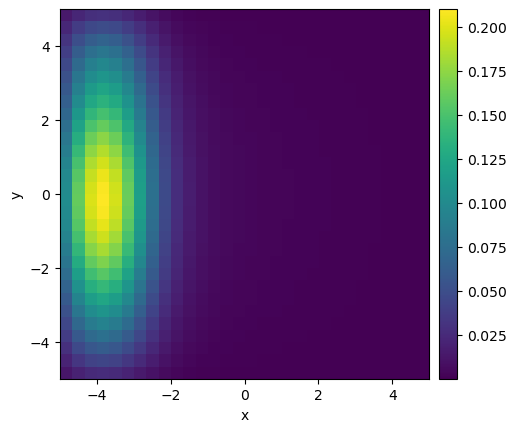

In [9]:
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph

# Expanded definition of the PDE
diffusivity = "1.01 + tanh(x)"
term_1 = f"({diffusivity}) * laplace(c)"
term_2 = f"dot(gradient({diffusivity}), gradient(c))"
eq = PDE({"c": f"{term_1} + {term_2}"}, bc={"value": 0})


grid = CartesianGrid([[-5, 5], [-5, 5]], [30, 30])  # generate grid
field = ScalarField.random_normal(grid, mean=0.5)  # generate initial condition

storage = MemoryStorage()  # store intermediate information of the simulation
res = eq.solve(field, 100, dt=1e-3, tracker=storage.tracker(1))  # solve the PDE
res.plot()

  0%|          | 0/10.0 [00:00<?, ?it/s]

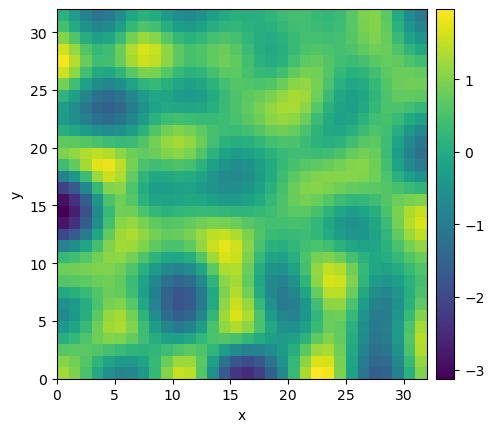

In [6]:
from pde import PDEBase, ScalarField, UnitGrid


class KuramotoSivashinskyPDE(PDEBase):
    """Implementation of the normalized Kuramoto–Sivashinsky equation"""

    def evolution_rate(self, state, t=0):
        """implement the python version of the evolution equation"""
        state_lap = state.laplace(bc="auto_periodic_neumann")
        state_lap2 = state_lap.laplace(bc="auto_periodic_neumann")
        state_grad = state.gradient(bc="auto_periodic_neumann")
        return -state_grad.to_scalar("squared_sum") / 2 - state_lap - state_lap2


grid = UnitGrid([32, 32])  # generate grid
state = ScalarField.random_uniform(grid)  # generate initial condition

eq = KuramotoSivashinskyPDE()  # define the pde
result = eq.solve(state, t_range=10, dt=0.01)
result.plot()